## 1. K-mean visualization 

### 1.1 advantage

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score

sample_df = pd.read_csv("k_mean_advantage.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]

#### 1.1.1 visualization of truth class labels

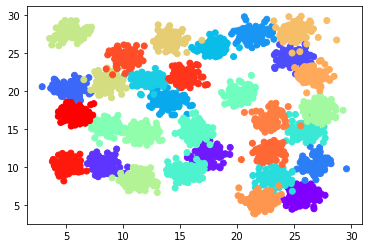

In [2]:
plt.scatter(training_points["col1"], training_points["col2"], c=training_labels, cmap='rainbow')

#### 1.1.2 visualization of pred class labels

best n_cluster :  31
adjusted rand score :  0.9529068038577629


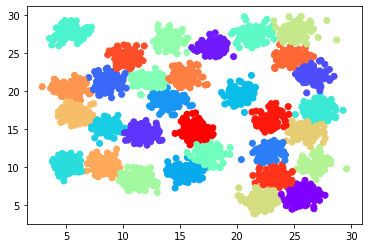

In [3]:
max=0
for a in range(1, 40, 1):
    kmeans = KMeans(n_clusters=a).fit(training_points)
    arc = adjusted_rand_score(training_labels, kmeans.labels_)
    if (max<arc):
        max=arc
        result_a=a

print("best n_cluster : ", result_a)
print("adjusted rand score : ", max)
kmeans = KMeans(n_clusters=result_a).fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=kmeans.labels_, cmap='rainbow')

1.1.1은 sample_df의 실제 군집(group)을 scatter plot으로 나타낸 것이다.  
scatter plot을 통해 확인한 sample_df는 실제 31개의 군집을 가지며, 군집이 명확하게 구분되는 특징을 가진다는 것을 알 수 있다.  
다음으로 1.1.2의 scatter plot은 k-means clustering을 통해 sample_df를 여러 군집으로 나눈 결과를 나타낸다.  
k-means clustering을 통해 31개의 군집으로 분류했을 때, 실제 군집과의 유사성(ARI)이 약 0.95로 가장 높았음을 알 수 있다.

### 1.2 disadvantage

In [4]:
sample_df = pd.read_csv("k_mean_disadvantage.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]

#### 1.2.1 visualization of truth class labels

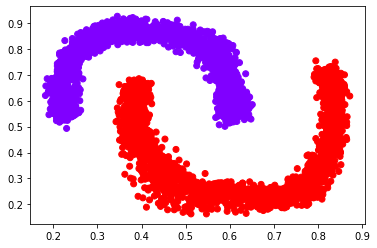

In [5]:
plt.scatter(training_points["col1"], training_points["col2"], c=training_labels, cmap='rainbow')

#### 1.2.2 visualization of pred class labels

best n_cluster :  2
adjusted rand score :  0.431563873187541


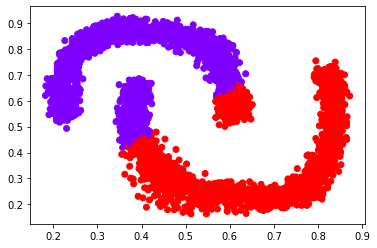

In [6]:
max=0
for a in range(1, 10, 1):
    kmeans = KMeans(n_clusters=a).fit(training_points)
    arc = adjusted_rand_score(training_labels, kmeans.labels_)
    if (max<arc):
        max=arc
        result_a=a

print("best n_cluster : ", result_a)
print("adjusted rand score : ", max)
kmeans = KMeans(n_clusters=result_a).fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=kmeans.labels_, cmap='rainbow')

1.2.1은 sample_df의 실제 군집(group)을 scatter plot으로 나타낸 것이다.  
scatter plot을 통해 확인한 sample_df는 실제 2개의 군집을 가지며, 군집이 원형의 모양이 아닌 포물선의 모양으로 형성되어 있음을 알 수 있다.   
다음으로 1.2.2의 scatter plot은 k-means clustering을 통해 sample_df를 여러 군집으로 나눈 결과를 나타낸다.  
k-means clustering을 통해 2개의 군집으로 분류했을 때, 실제 군집과의 유사성(ARI)이 약 0.43로 가장 높았음을 알 수 있다. 0.43의 ARI로 알 수 있듯이, k-means clustering으로 분류된 군집이 실제 군집을 잘나타내지 못하고 있다고 볼 수 있다. 
이는 원형의 클러스터에선 성능이 뛰어나지만, 이외의 클러스터(포물선 등)에서는 성능을 보장할 수 없다는 k-mean clustering 알고리즘의 단점의 한 예시가 될 수 있다.

## 2. Hierarchical visualization - single linkage

### 2.1 advantage

In [7]:
sample_df = pd.read_csv("single_advantage.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]

#### 2.1.1 visualization of truth class labels

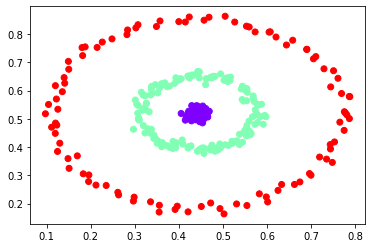

In [8]:
plt.scatter(training_points["col1"], training_points["col2"], c=training_labels, cmap='rainbow')

#### 2.1.2 visualization of pred class labels

best n_cluster :  3
adjusted rand score :  1.0


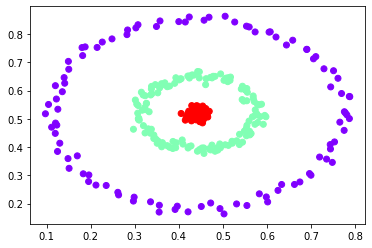

In [9]:
max=0
for a in range(1, 10, 1):
    agglo = AgglomerativeClustering(n_clusters=a, linkage="single").fit(training_points)
    arc = adjusted_rand_score(training_labels, agglo.labels_)
    if (max<arc):
        max=arc
        result_a=a

print("best n_cluster : ", result_a)
print("adjusted rand score : ", max)
aggloans = AgglomerativeClustering(n_clusters=result_a, linkage="single").fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=aggloans.labels_, cmap='rainbow')

2.1.1은 sample_df의 실제 군집(group)을 scatter plot으로 나타낸 것이다.  
scatter plot을 통해 확인한 sample_df는 실제 3개의 군집을 가지며, 가운데 원형 군집과 이를 둘러썬 2개의 원형 고리모양의 군집으로 형성되어 있음을 알 수 있다.      
다음으로 2.1.2의 scatter plot은 Hierarchical clustering의 single-linkage를 통해 sample_df를 여러 군집으로 나눈 결과를 나타낸다.  
single-linkage를 이용한 Hierarchical clustering으로 3개의 군집으로 분류했을 때, 실제 군집과의 유사성(ARI)이 1로 가장 높았음을 알 수 있다.

### 2.2 disadvantage

In [10]:
sample_df = pd.read_csv("single_disadvantage.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]

#### 2.2.1 visualization of truth class labels

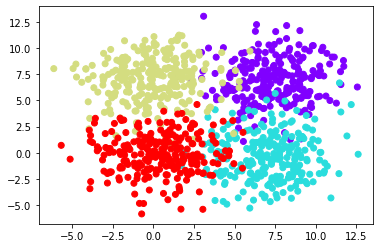

In [11]:
plt.scatter(training_points["col1"], training_points["col2"], c=training_labels, cmap='rainbow')

#### 2.2.2 visualization of pred class labels

best n_cluster :  18
adjusted rand score :  9.847889450067378e-05


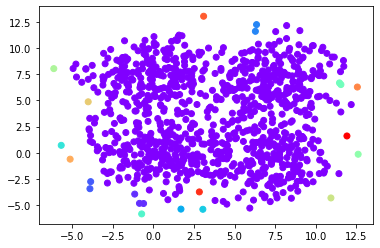

In [12]:
max=0
for a in range(1, 20, 1):
    agglo = AgglomerativeClustering(n_clusters=a, linkage="single").fit(training_points)
    arc = adjusted_rand_score(training_labels, agglo.labels_)
    if (max<arc):
        max=arc
        result_a=a

print("best n_cluster : ", result_a)
print("adjusted rand score : ", max)
aggloans = AgglomerativeClustering(n_clusters=result_a, linkage="single").fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=aggloans.labels_, cmap='rainbow')

2.2.1은 sample_df의 실제 군집(group)을 scatter plot으로 나타낸 것이다.  
scatter plot을 통해 확인한 sample_df는 실제 4개의 군집을 가지며, 군집끼리 비교적 가깝게 위치하고 있음을 볼 수 있다.
다음으로 2.2.2의 scatter plot은 Hierarchical clustering의 single-linkage를 통해 sample_df를 여러 군집으로 나눈 결과를 나타낸다.  
single-linkage를 이용한 Hierarchical clustering으로 18개의 군집으로 분류했을 때, 실제 군집과의 유사성(ARI)이 약0.00009로 가장 높았음을 알 수 있다.  
그러나 이것은 군집을 분류하는 데 있어 유의하다고 볼 수 없을 정도의 매우 작은 값으로, single-linkage를 이용한 Hierarchical clustering으로 분류된 군집이 실제 군집을 잘나타내지 못하고 있다고 볼 수 있다.
이는 non-elliptical 클러스터에선 비교적 성능이 뛰어나지만, 거리가 가까운 작은 군집이 거대한 하나의 군집으로 연결되는 체이닝 현상을 발생시킬 수 있는 single-linkage를 이용한 Hierarchical clustering 알고리즘의 단점의 한 예시가 될 수 있다.

## 3. hierarchical visualization - complete linkage

### 3.1 advantage

In [13]:
sample_df = pd.read_csv("complete_advantage.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]

#### 3.1.1 visualization of truth class labels

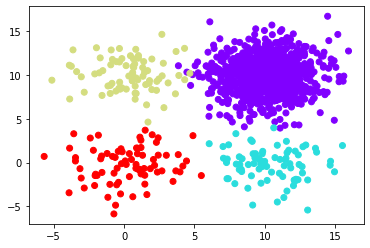

In [14]:
plt.scatter(training_points["col1"], training_points["col2"], c=training_labels, cmap='rainbow')

#### 3.1.2 visualization of pred class labels

best n_cluster :  4
adjusted rand score :  0.8708575296726269


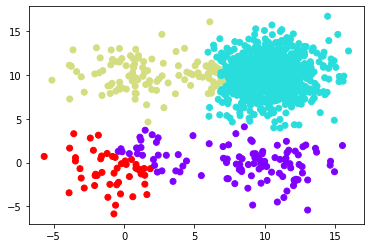

In [15]:
max=0
for a in range(1, 20, 1):
    agglo = AgglomerativeClustering(n_clusters=a, linkage="complete").fit(training_points)
    arc = adjusted_rand_score(training_labels, agglo.labels_)
    if (max<arc):
        max=arc
        result_a=a

print("best n_cluster : ", result_a)
print("adjusted rand score : ", max)
aggloans = AgglomerativeClustering(result_a, linkage="complete").fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=aggloans.labels_, cmap='rainbow')

3.1.1은 sample_df의 실제 군집(group)을 scatter plot으로 나타낸 것이다.  
scatter plot을 통해 확인한 sample_df는 실제 4개의 군집을 가지며, 4개 중 한개의 군집의 밀도가 특히 높은 것을 볼 수 있다.
다음으로 3.1.2의 scatter plot은 Hierarchical clustering의 complete-linkage를 통해 sample_df를 여러 군집으로 나눈 결과를 나타낸다.  
complete-linkage를 이용한 Hierarchical clustering으로 4개의 군집으로 분류했을 때, 실제 군집과의 유사성(ARI)이 약 0.87로 가장 높았음을 알 수 있다.

### 3.2 disadvantage

In [16]:
sample_df = pd.read_csv("complete_disadvantage.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]

#### 3.2.1 visualization of truth class labels

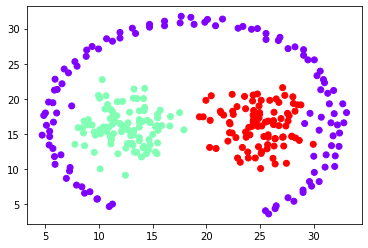

In [17]:
plt.scatter(training_points["col1"], training_points["col2"], c=training_labels, cmap='rainbow')

#### 3.2.2 visualization of pred class labels

best n_cluster :  3
adjusted rand score :  0.3455207247421115


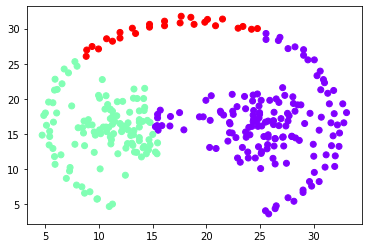

In [18]:
max=0
for a in range(1, 20, 1):
    agglo = AgglomerativeClustering(n_clusters=a, linkage="complete").fit(training_points)
    arc = adjusted_rand_score(training_labels, agglo.labels_)
    if (max<arc):
        max=arc
        result_a=a

print("best n_cluster : ", result_a)
print("adjusted rand score : ", max)
aggloans = AgglomerativeClustering(result_a, linkage="complete").fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=aggloans.labels_, cmap='rainbow')

3.2.1은 sample_df의 실제 군집(group)을 scatter plot으로 나타낸 것이다.  
scatter plot을 통해 확인한 sample_df는 실제 3개의 군집을 가지며, 2개의 원형 군집과 2개의 군집을 둘러싸고 있는 1개의 아래가 끊어진 원형 고리모형을 볼 수 있다.
다음으로 3.2.2의 scatter plot은 Hierarchical clustering의 complete-linkage를 통해 sample_df를 여러 군집으로 나눈 결과를 나타낸다.  
complete-linkage를 이용한 Hierarchical clustering으로 3개의 군집으로 분류했을 때, 실제 군집과의 유사성(ARI)이 약 0.35로 가장 높았음을 알 수 있다. 0.35의 ARI로 알 수 있듯이, complete-linkage를 이용한 Hierarchical clustering으로 분류된 군집이 실제 군집을 잘나타내지 못하고 있다고 볼 수 있다.   
이는 single-linkage와 비슷하게, 거리가 가까운 작은 군집이 거대한 하나의 군집으로 연결되는 체이닝 현상을 발생시킬 수 있는 complete-linkage를 이용한 Hierarchical clustering 알고리즘의 단점의 한 예시가 될 수 있다.

## 4. DBSCAN visualization 

### 4.1 advantage

In [19]:
sample_df = pd.read_csv("dbscan_advantage.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]

#### 4.1.1 visualization of truth class labels

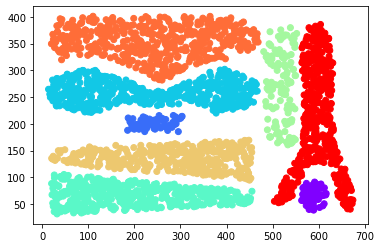

In [20]:
plt.scatter(training_points["col1"], training_points["col2"], c=training_labels, cmap='rainbow')

#### 4.1.2 visualization of pred class labels

best eps :  15
best min_samples :  2
adjusted rand score :  0.9974098427760053


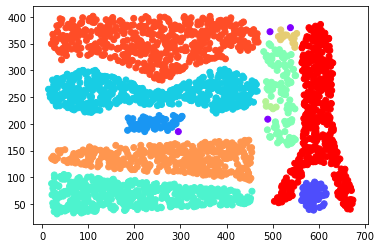

In [21]:
max=0
for a in range(1, 20, 1):
    for b in range(1, 20, 1): 
        dbscan = DBSCAN(eps=a, min_samples=b).fit(training_points)
        arc = adjusted_rand_score(training_labels, dbscan.labels_)
        if (max<arc):
            max=arc
            result_a=a
            result_b=b

print("best eps : ", result_a)
print("best min_samples : ", result_b)
print("adjusted rand score : ", max)
dbscan = DBSCAN(eps=result_a, min_samples=result_b).fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=dbscan.labels_, cmap='rainbow')

4.1.1은 sample_df의 실제 군집(group)을 scatter plot으로 나타낸 것이다.  
scatter plot을 통해 확인한 sample_df는 실제 8개의 군집을 가지며, 한개의 원형 군집을 제외하고 나머지 군집이 특수한 모형을 가짐을 볼 수 있다.  
다음으로 4.1.2의 scatter plot은 DBSCAN를 통해 sample_df를 여러 군집으로 나눈 결과를 나타낸다.    
DBSCAN의 eps을 15, min_samples을 2로 조절하였을 때, 실제 군집과의 유사성(ARI)이 약 0.99로 가장 높았음을 알 수 있다.

### 4.2 disadvantage

In [22]:
sample_df = pd.read_csv("dbscan_disadvantage.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]

#### 4.2.1 viusalization of truth class labels

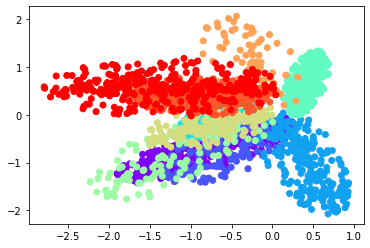

In [23]:
plt.scatter(training_points["col1"], training_points["col2"], c=training_labels, 
cmap='rainbow')

#### 4.2.2 viusalization of pred class labels

best eps :  0.044
best min_samples :  1
adjusted rand score :  0.29189094762800044


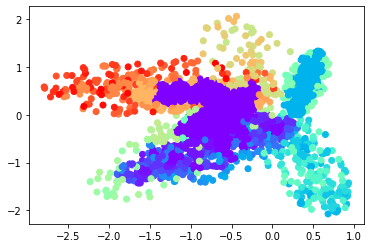

In [24]:
max=0
for a in range(1, 100, 1):
    for b in range(1, 10, 1): 
        dbscan = DBSCAN(eps=a*0.001, min_samples=b).fit(training_points)
        arc = adjusted_rand_score(training_labels, dbscan.labels_)
        if (max<arc):
            max=arc
            result_a=a
            result_b=b
            
print("best eps : ", result_a*0.001)
print("best min_samples : ", result_b)
print("adjusted rand score : ", max)
dbscan = DBSCAN(eps=result_a*0.001, min_samples=result_b).fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=dbscan.labels_, cmap='rainbow')

4.2.1은 sample_df의 실제 군집(group)을 scatter plot으로 나타낸 것이다.  
scatter plot을 통해 확인한 sample_df는 실제 8개의 군집을 가지며, 대부분의 군집이 서로 겹치며 명확하게 구분되지 않는 특징을 가진다.
다음으로 4.2.2의 scatter plot은 DBSCAN를 통해 sample_df를 여러 군집으로 나눈 결과를 나타낸다.  
DBSCANdml eps을 0.044, min_samples을 1로 조절하였을 때, 실제 군집과의 유사성(ARI)이 약 0.29로 가장 높았음을 알 수 있다. 0.29의 ARI로 알 수 있듯이, DBSCAN으로 분류된 군집이 실제 군집을 잘나타내지 못하고 있다고 볼 수 있다.  
DBSCAN은 데이터 밀도가 균일하지 않을 때, 성능이 좋지 않지 않다는 단점이 존재한다. 그러나 sample_df 데이터의 군집은 기본적으로 명확하게 분류되지 않는다는 점에서, 어떤 군집화 알고리즘을 사용해도 ARI가 높지 않을 것으로 예상된다.